# Data, ML Ensemble Schemes and Deep Learning on FPGAs

Nowadays, one can observe massive amount of data production by numerous devices interacting with their environment and end users. Such data can be the subject of advanced processing usually through machine learning algorithms. Hence, we are able to provide intelligent applications and analytics in many research domains like health informatics, information technology, environmental sciences, and so on so forth. However, choosing the appropriate machine learning model for data processing can be one of the most difficult tasks.




### Benchmarking of multiple Machine Learning Algorithms

In [1]:
#Importing the libraries

import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load the dataset

#Available datasets: Churn_Modelling.csv / humanpres.csv
#Type the name of the dataset

print("Load the dataset")
filename = input('Name of the dataset: ')
print("")


dataset = pd.read_csv(filename)

Load the dataset
Name of the dataset: humanpres.csv



In [4]:
array = dataset.values
X = array[:,:-1]
Y = array[:,-1]

In [5]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.20, random_state=1)

In [6]:
# Make predictions on validation dataset with Naive Bayes

nb = GaussianNB()
nb.fit(X_train, Y_train)
predictions = nb.predict(X_test)
print("")
print('--------------------------------')
print('Accuracy score with Naive Bayes') 
print('--------------------------------')
print("")
print(accuracy_score(Y_test, predictions))
print("")
print('------------------')
print('Confusion Matrix')
print('------------------')
print("")
print(confusion_matrix(Y_test, predictions))
print("")
print('----------------------')
print('Classification Report')
print('----------------------')
print("")
print(classification_report(Y_test, predictions))


--------------------------------
Accuracy score with Naive Bayes
--------------------------------

0.9797421731123389

------------------
Confusion Matrix
------------------

[[1241   29]
 [   4  355]]

----------------------
Classification Report
----------------------

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      1270
         1.0       0.92      0.99      0.96       359

   micro avg       0.98      0.98      0.98      1629
   macro avg       0.96      0.98      0.97      1629
weighted avg       0.98      0.98      0.98      1629



In [7]:
# Make predictions on validation dataset with Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_test)
print("")
print('---------------------------------------')
print('Accuracy score with Logistic Regression') 
print('---------------------------------------')
print("")
print(accuracy_score(Y_test, predictions))
print("")
print('------------------')
print('Confusion Matrix')
print('------------------')
print("")
print(confusion_matrix(Y_test, predictions))
print("")
print('----------------------')
print('Classification Report')
print('----------------------')
print("")
print(classification_report(Y_test, predictions))


---------------------------------------
Accuracy score with Logistic Regression
---------------------------------------

0.9883364027010436

------------------
Confusion Matrix
------------------

[[1252   18]
 [   1  358]]

----------------------
Classification Report
----------------------

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1270
         1.0       0.95      1.00      0.97       359

   micro avg       0.99      0.99      0.99      1629
   macro avg       0.98      0.99      0.98      1629
weighted avg       0.99      0.99      0.99      1629



In [8]:
# Make predictions on validation dataset with K-Neighbors Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
print("")
print('------------------------------------------')
print('Accuracy score with K-Neighbors Classifier') 
print('------------------------------------------')
print("")
print(accuracy_score(Y_test, predictions))
print("")
print('------------------')
print('Confusion Matrix')
print('------------------')
print("")
print(confusion_matrix(Y_test, predictions))
print("")
print('----------------------')
print('Classification Report')
print('----------------------')
print("")
print(classification_report(Y_test, predictions))


------------------------------------------
Accuracy score with K-Neighbors Classifier
------------------------------------------

0.9901780233271946

------------------
Confusion Matrix
------------------

[[1256   14]
 [   2  357]]

----------------------
Classification Report
----------------------

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1270
         1.0       0.96      0.99      0.98       359

   micro avg       0.99      0.99      0.99      1629
   macro avg       0.98      0.99      0.99      1629
weighted avg       0.99      0.99      0.99      1629



In [9]:
# Make predictions on validation dataset with Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
predictions = dt.predict(X_test)
print("")
print('--------------------------------------------')
print('Accuracy score with Decision Tree Classifier') 
print('--------------------------------------------')
print("")
print(accuracy_score(Y_test, predictions))
print("")
print('------------------')
print('Confusion Matrix')
print('------------------')
print("")
print(confusion_matrix(Y_test, predictions))
print("")
print('----------------------')
print('Classification Report')
print('----------------------')
print("")
print(classification_report(Y_test, predictions))


--------------------------------------------
Accuracy score with Decision Tree Classifier
--------------------------------------------

0.992633517495396

------------------
Confusion Matrix
------------------

[[1265    5]
 [   7  352]]

----------------------
Classification Report
----------------------

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1270
         1.0       0.99      0.98      0.98       359

   micro avg       0.99      0.99      0.99      1629
   macro avg       0.99      0.99      0.99      1629
weighted avg       0.99      0.99      0.99      1629



### Ensemble schemes of ML Algorithms

The first ensemble scheme with Max-voting. Both had and soft voting examples are included.

In [10]:
#Ensemble with Max-Voting(Hard and soft Voting)

estimators = []


estimators.append(('Logistic Regression', lr))


estimators.append(('Decision Tree Classifier', dt))


estimators.append(('K-Neighbors',knn))


estimators.append(('Naive Bayes',nb))

In [11]:
ensemble_model_hard = VotingClassifier(estimators=estimators, voting='hard')
ensemble_model_hard.fit(X_train,Y_train)
predictions1=ensemble_model_hard.predict(X_test)

In [12]:
print("Accuracy with hard voting: ",accuracy_score(Y_test,predictions1))

Accuracy with hard voting:  0.9901780233271946


In [13]:
ensemble_model_soft = VotingClassifier(estimators=estimators, voting='soft')
ensemble_model_soft.fit(X_train,Y_train)
predictions2=ensemble_model_soft.predict(X_test)

In [14]:
print("Accuracy with soft voting: ",accuracy_score(Y_test,predictions2))

Accuracy with soft voting:  0.9895641497851443


#### Bagging Classifiers

In [15]:
#Bagging Classifiers
from sklearn.ensemble import BaggingClassifier

In [16]:
dt= DecisionTreeClassifier(criterion='entropy')
bag_dt = BaggingClassifier(dt, max_features=1.0, n_estimators=5, \
                                 random_state=1, bootstrap=True)

In [17]:
bag_dt.fit(X_train, Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=5, n_jobs=None, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

In [18]:
bag_dt.score(X_test, Y_test)

0.9950890116635973

#### The Mlxtend Package

In [19]:
#Mlxtend
from mlxtend.classifier import StackingClassifier

In [20]:
alg1 = KNeighborsClassifier(n_neighbors=1)
alg2 = DecisionTreeClassifier()
alg3 = GaussianNB()
meta = LogisticRegression()
stacking = StackingClassifier(classifiers=[alg1, alg2, alg3], 
                          meta_classifier=meta)

In [21]:
for alg, label in zip([alg1, alg2, alg3, stacking], 
                      ['KNN', 
                       'Decision Tree', 
                       'Naive Bayes',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(alg, X, Y, 
                                              cv=5, scoring='accuracy')
    print("Accuracy: %0.2f  [%s]" 
          % (scores.mean(), label))

Accuracy: 0.94  [KNN]
Accuracy: 0.93  [Decision Tree]
Accuracy: 0.96  [Naive Bayes]
Accuracy: 0.95  [StackingClassifier]


#### Random Forest Classification

In [22]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [23]:
y_pred = classifier.predict(X_test)

In [24]:
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[1266    4]
 [   5  354]]


In [25]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = 5)

In [26]:
accuracies.mean()

0.992938309678834

#### The Mlens Package

In [27]:
#Mlens

from mlens.ensemble import SuperLearner
from sklearn.ensemble import RandomForestClassifier

[MLENS] backend: threading


In [28]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [29]:
array = dataset.values
X = array[:,:-1]
Y = array[:,-1]

In [30]:
ensemble = SuperLearner(scorer=accuracy_score, random_state=0, verbose=2)

In [31]:
ensemble.add([RandomForestClassifier(random_state=0), LogisticRegression()])

SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=0, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_excep...cc3d4f8>)],
   n_jobs=-1, name='group-0', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=0, sample_size=20,
       scorer=<function accuracy_score at 0xacc3d4f8>, shuffle=False,
       verbose=2)

In [32]:
ensemble.add([LogisticRegression(), SVC()])

SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=0, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_excep...cc3d4f8>)],
   n_jobs=-1, name='group-1', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=0, sample_size=20,
       scorer=<function accuracy_score at 0xacc3d4f8>, shuffle=False,
       verbose=2)

In [33]:
ensemble.add_meta(SVC())

SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=0, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_excep...cc3d4f8>)],
   n_jobs=-1, name='group-2', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=0, sample_size=20,
       scorer=<function accuracy_score at 0xacc3d4f8>, shuffle=False,
       verbose=2)

In [34]:
ensemble.fit(X[:75], Y[:75])
preds = ensemble.predict(X[75:])
print("Fit data:\n%r" % ensemble.data)


Fitting 3 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Processing layer-3             done | 00:00:00
Fit complete                        | 00:00:01

Predicting 3 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Processing layer-3             done | 00:00:00
Predict complete                    | 00:00:01
Fit data:
                                   score-m  score-s  ft-m  ft-s  pt-m  pt-s
layer-1  logisticregression           0.79     0.03  0.01  0.00  0.00  0.00
layer-1  randomforestclassifier       0.84     0.00  0.15  0.05  0.01  0.00
layer-2  logisticregression           0.81     0.00  0.01  0.00  0.01  0.00
layer-2  svc                          0.84     0.00  0.01  0.00  0.00  0.00



In [35]:
print("Prediction score: %.3f" % accuracy_score(preds, Y[75:]))

Prediction score: 0.785


### Deep Learning with Quantized Neural Network

In [36]:
import bnn
import os

In [37]:
print(bnn.available_params(bnn.NETWORK_LFCW1A1))

['fashion_mnist', 'mnist', 'sign-param-lfcW1A1-pynq', 'signlanguage', 'signlang2', 'chars_merged', 'signlang']


In [38]:

hw_classifier = bnn.LfcClassifier(bnn.NETWORK_LFCW1A1,"signlanguage",bnn.RUNTIME_HW)


In [39]:
print(hw_classifier.classes)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K']


In [40]:
from PIL import Image
from array import *

def image_to_mnist(im, fp, invert=False):
    # resize the image and invert if desired
    # MNIST is white digits on black background
    smallimg = im.resize((28, 28))
    if invert:
        smallimg = ImageOps.invert(smallimg)
    # convert to byte array for MNIST storage
    data_image = array('B')
    pixel = smallimg.load()
    for x in range(0,28):
        for y in range(0,28):
            data_image.append(pixel[y,x])
    # Setting up the header of the MNIST format file
    hexval = "{0:#0{1}x}".format(1,6)
    header = array('B')
    header.extend([0,0,8,1,0,0])
    header.append(int('0x'+hexval[2:][:2],16))
    header.append(int('0x'+hexval[2:][2:],16))
    header.extend([0,0,0,28,0,0,0,28])
    header[3] = 3 # Changing MSB for image data (0x00000803)
    # write header and data to file
    data_image = header + data_image
    data_image.tofile(fp)

In [41]:
img_load = Image.open("/home/xilinx/jupyter_notebooks/bnn/pictures/img_20.png").convert("L")
with open("7-mnist-formatted", "wb") as fp:
    image_to_mnist(img_load, fp)
    

In [42]:
class_out = hw_classifier.classify_mnist("7-mnist-formatted")
print("Class number: {0}".format(class_out))
print("Class name: {0}".format(hw_classifier.class_name(class_out)))
display(img_load)

Inference took 23.00 microseconds
Classification rate: 43478.26 images per second
Class number: 2
Class name: C


In [8]:
sw_classifier = bnn.LfcClassifier(bnn.NETWORK_LFCW1A1,"signlanguage",bnn.RUNTIME_SW)

In [9]:
class_out=sw_classifier.classify_mnist("7-mnist-formatted")
print("Class number: {0}".format(class_out))
print("Class name: {0}".format(hw_classifier.class_name(class_out)))

Inference took 81096.00 microseconds
Classification rate: 12.33 images per second
Class number: 0
Class name: A


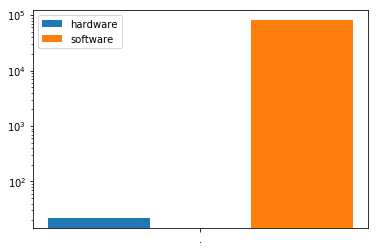

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

hw_time = [hw_classifier.usecPerImage]
           
sw_time = [sw_classifier.usecPerImage]
           
          
x_axis = ('.')


y_pos = np.arange(len(x_axis))
plt.bar(y_pos-0.25, hw_time, 0.25)
plt.bar(y_pos+0.25, sw_time, 0.25)
plt.xticks(y_pos, x_axis)
plt.legend(["hardware","software"])
plt.semilogy()
plt.show()

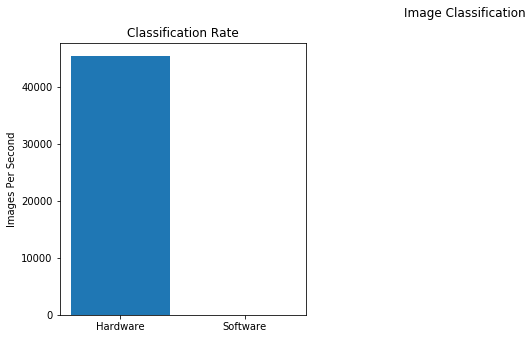

In [11]:
names = ['Hardware', 'Software']
values = [1000000.0/hw_classifier.usecPerImage, 1000000.0/sw_classifier.usecPerImage]

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.bar(names, values)

plt.ylabel('Images Per Second')
plt.title('Classification Rate')


plt.suptitle('Image Classification')
plt.show()

In [ ]:
from pynq import Xlnk

xlnk = Xlnk();
xlnk.xlnk_reset()